## Business Case:

The business case is on the inventory management. Keeping
Inventory of spare parts in various service centre to the market demand is
always a challenge as most service centres spends significant amount
in spare parts inventory costs. In spite of this, availability of spare
parts is been one of the problem areas.

### Business Problem Summary:
Service centers often struggle to balance spare parts availability with cost. Over-ordering leads to high inventory holding costs, while under-stocking leads to delays in repairs, unhappy customers, and potential loss of business. Despite significant investment in inventory, service centers still face issues with parts unavailability, indicating inefficiencies in inventory forecasting and demand estimation.

The primary business challenge is to:

- Optimize spare parts inventory levels across various service centers.

- Achieve JIT (Just-in-Time) standards — having the right parts, at the right place, at the right time, with minimal stock holding.

##  Project Goal:
To build a predictive model that forecasts demand for spare parts in order to:

- Reduce inventory costs.

- Improve part availability.

- Enable Just-in-Time inventory management.

- Support decision-making on what parts to stock and in what quantity.

## Importing Necessary Libraries :

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## Load the Dataset :

In [155]:
file_path = r'F:\Machine_Learning\Ml_Projects\Inventory Management\data\raw\Inventory_management.csv'
try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)

except FileNotFoundError as fnf_error:
    print(f"{fnf_error}")
except pd.errors.EmptyDataError:
    print(" The CSV file is empty.")
except pd.errors.ParserError:
    print(" Error while parsing the CSV file.")
except Exception as e:
    print(f"Unexpected error occurred: {str(e)}")

Dataset loaded successfully.
Shape of the dataset: (28482, 7)


## **Basic Data Checks**

Before diving into data cleaning or modeling, we conduct initial checks to understand the structure and quality of the dataset. This includes:

- Viewing sample rows
- Checking dataset shape and column names
- Inspecting data types
- Identifying missing values
- Generating summary statistics
- Detecting object-type (categorical) features
- Checking for duplicate entries


In [156]:
# Show first 5 rows
display(df.head().to_string)

# Shape of the dataset
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Column names
print("\nColumn Names:")
print(df.columns.tolist())

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe().to_string)

# Object type columns (Categorical features)
print("\nCategorical Columns:")
print(df.columns[df.dtypes == 'object'].tolist())

# Check for duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


<bound method DataFrame.to_string of   invoice_date job_card_date business_partner_name  vehicle_no  \
0     30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model  current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220               50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                 758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                 758            POLISH  
3       BAJAJ PULSAR NS 200                 758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                 758       COOLANT OIL  >


Dataset Shape: 28482 rows and 7 columns

Column Names:
['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no', 'vehicle_model', 'current_km_reading', 'invoice_line_text']

Data Types:
invoice_date             object
job_card_date            object
business_partner_name    object
vehicle_no               object
vehicle_model            object
current_km_reading        int64
invoice_line_text        object
dtype: object

Missing Values:
invoice_date              0
job_card_date             0
business_partner_name     0
vehicle_no                0
vehicle_model             0
current_km_reading        0
invoice_line_text        34
dtype: int64

Summary Statistics:


<bound method DataFrame.to_string of        current_km_reading
count        28482.000000
mean         19348.003827
std          25246.722306
min              0.000000
25%           3988.000000
50%          12420.500000
75%          27905.000000
max         610112.000000>


Categorical Columns:
['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no', 'vehicle_model', 'invoice_line_text']

Duplicate Rows: 383


## Summary of Basic Data Checks - Spare Parts Inventory Dataset

1. Dataset Overview:
   - Total Rows: 28,482
   - Total Columns: 7
   - Historical records of spare parts invoiced in service centers.

2. Column Information & Data Types:
   invoice_date           : object  
   job_card_date          : object  
   business_partner_name  : object  
   vehicle_no             : object 
   vehicle_model          : object  
   current_km_reading     : int64   
   invoice_line_text      : object  

3. Missing Values:
   - invoice_line_text: 34 missing entries
   - Other columns: No missing values

4. Summary Statistics for 'current_km_reading':
   count      : 28,482
   mean       : 19,348 km
   std dev    : 25,246 km
   min        : 0 km
   25th pct   : 3,988 km
   median     : 12,420 km
   75th pct   : 27,905 km
   max        : 610,112 km 

5. Categorical Columns:
   ['invoice_date', 'job_card_date', 'business_partner_name', 
    'vehicle_no', 'vehicle_model', 'invoice_line_text']

6. Duplicate Rows:
   - 383 duplicates found





In [157]:
"""
   - Convert 'invoice_date' and 'job_card_date' to datetime objects.
   - Handle missing values in 'invoice_line_text'.
   - Remove duplicate rows.
   - Handiling outliers in 'current_km_reading'.
   - Normalize and clean text data in 'invoice_line_text'.
   - Create time-based features for forecasting.
   - Aggregate data by spare parts and time for demand prediction.
   """

"\n   - Convert 'invoice_date' and 'job_card_date' to datetime objects.\n   - Handle missing values in 'invoice_line_text'.\n   - Remove duplicate rows.\n   - Handiling outliers in 'current_km_reading'.\n   - Normalize and clean text data in 'invoice_line_text'.\n   - Create time-based features for forecasting.\n   - Aggregate data by spare parts and time for demand prediction.\n   "

In [158]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d-%m-%y')
df['job_card_date'] = pd.to_datetime(df['job_card_date'], format='%d-%m-%y')

In [159]:
df[df['invoice_line_text'].isnull()]

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
545,2017-06-16,2017-06-13,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,2615,NaN
632,2017-06-15,2017-06-14,naveXXXXXXXXXX,KA53W3XXXX,BAJAJ DISCOVER 150,25677,NaN
635,2017-06-15,2017-06-14,naveXXXXXXXXXX,KA53W3XXXX,BAJAJ DISCOVER 150,25677,NaN
661,2017-06-15,2017-06-14,kailXXXXXXXXXX,KA01HNXXXX,BAJAJ PULSAR 150,8679,NaN
769,2017-06-16,2017-06-16,hariXXXXXXXXXX,KA53ESXXXX,BAJAJ AVENGER STREET,457,NaN
2139,2017-07-21,2017-07-21,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,12457,NaN
2579,2017-08-01,2017-08-01,hariXXXXXXXXXX,KA53EQXXXX,BAJAJ PULSAR 150,9677,NaN
2613,2017-08-03,2017-08-03,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,251447,NaN
10809,2018-02-27,2018-02-27,PRAVXXXXXXXXXX,KA04JBXXXX,BAJAJ PULSAR 150,24447,NaN
10810,2018-02-27,2018-02-27,PRAVXXXXXXXXXX,KA04JBXXXX,BAJAJ PULSAR 150,24447,NaN


In [160]:
## Filling the Invoice_line_text missing values as Unknown:
df['invoice_line_text'] = df['invoice_line_text'].fillna('unknown')

In [161]:
df.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        0
dtype: int64

In [162]:
## Remove duplicate rows :
print(df[df.duplicated()].count())
df[df.duplicated()]

invoice_date             383
job_card_date            383
business_partner_name    383
vehicle_no               383
vehicle_model            383
current_km_reading       383
invoice_line_text        383
dtype: int64


,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
40,2017-06-03,2017-05-31,MAYAXXXXXXXXXX,KA05JGXXXX,BAJAJ PULSAR 220,25000,DISC PAD
43,2017-06-05,2017-06-01,srivXXXXXXXXXX,KA02EWXXXX,BAJAJ PULSAR 150,41458,BRAKE ADJUSTMENT
579,2017-06-13,2017-06-13,subhXXXXXXXXXX,KA53J9XXXX,BAJAJ AVENGER STREET 220,14484,SILENCER
635,2017-06-15,2017-06-14,naveXXXXXXXXXX,KA53W3XXXX,BAJAJ DISCOVER 150,25677,unknown
886,2017-06-20,2017-06-20,JIBUXXXXXXXXXX,KA53ENXXXX,BAJAJ CT 100,10207,BRAKE SHOE
...,...,...,...,...,...,...,...
28216,2019-01-02,2019-01-02,RITEXXXXXXXXXX,MH12LFXXXX,BAJAJ PULSAR 150,19114,SPROCKET BEARING
28229,2019-01-03,2019-01-03,GLENXXXXXXXXXX,KA53EVXXXX,BAJAJ PULSAR NS 160,11113,BRAKE SHOE
28318,2019-01-04,2019-01-04,ALOKXXXXXXXXXX,KA53EWXXXX,BAJAJ CT 100,27786,BRAKE SHOE
28346,2019-01-04,2019-01-04,yeshXXXXXXXXXX,KA40ECXXXX,BAJAJ PULSAR 220,11541,DISC PAD


In [163]:
df.drop_duplicates(inplace=True)

In [164]:
df['invoice_line_text'].value_counts()

invoice_line_text
ENGINE OIL           3780
CHAIN LUBRICATION    3417
GENERAL SERVICE      2132
AIR FILTER           1698
3M OIL               1615
                     ... 
CLUTCH ROLLERS          1
CLUTCH SPRING KIT       1
CLUTCH SHOE             1
U BUSH                  1
HELMET                  1
Name: count, Length: 503, dtype: int64

In [165]:
# Text cleaning of Invoice_line_text :
#Standardize invoice_line_text:

text_map={
    'OVERHUAL':'OVERHAUL',
    'WIELDING':'WELDING',
    'ENGINE OIL TOPUP':'ENGINE OIL',
    'ASSEBLY':'ASSEMBLY',
    'GRIP HANDLE':'HANDLE GRIPPER',
    'HANDLEBAR':'HANDLE BAR',
    'NUMBER PLATE WITH STICKERS':'NUMBER PLATE'
}

df['invoice_line_text']=df['invoice_line_text'].replace(text_map)
df['invoice_line_text'] = df['invoice_line_text'].str.strip().str.capitalize()

In [166]:
df[df['invoice_line_text']=='Unknown']

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
545,2017-06-16,2017-06-13,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,2615,Unknown
632,2017-06-15,2017-06-14,naveXXXXXXXXXX,KA53W3XXXX,BAJAJ DISCOVER 150,25677,Unknown
661,2017-06-15,2017-06-14,kailXXXXXXXXXX,KA01HNXXXX,BAJAJ PULSAR 150,8679,Unknown
769,2017-06-16,2017-06-16,hariXXXXXXXXXX,KA53ESXXXX,BAJAJ AVENGER STREET,457,Unknown
2139,2017-07-21,2017-07-21,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,12457,Unknown
2579,2017-08-01,2017-08-01,hariXXXXXXXXXX,KA53EQXXXX,BAJAJ PULSAR 150,9677,Unknown
2613,2017-08-03,2017-08-03,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,251447,Unknown
10809,2018-02-27,2018-02-27,PRAVXXXXXXXXXX,KA04JBXXXX,BAJAJ PULSAR 150,24447,Unknown
10911,2018-03-01,2018-03-01,DARSXXXXXXXXXX,KA04JAXXXX,BAJAJ PULSAR 150,36075,Unknown
11182,2018-03-07,2018-03-07,AVINXXXXXXXXXX,KA51ERXXXX,BAJAJ DISCOVER 125,14927,Unknown


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28099 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   invoice_date           28099 non-null  datetime64[ns]
 1   job_card_date          28099 non-null  datetime64[ns]
 2   business_partner_name  28099 non-null  object        
 3   vehicle_no             28099 non-null  object        
 4   vehicle_model          28099 non-null  object        
 5   current_km_reading     28099 non-null  int64         
 6   invoice_line_text      28099 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


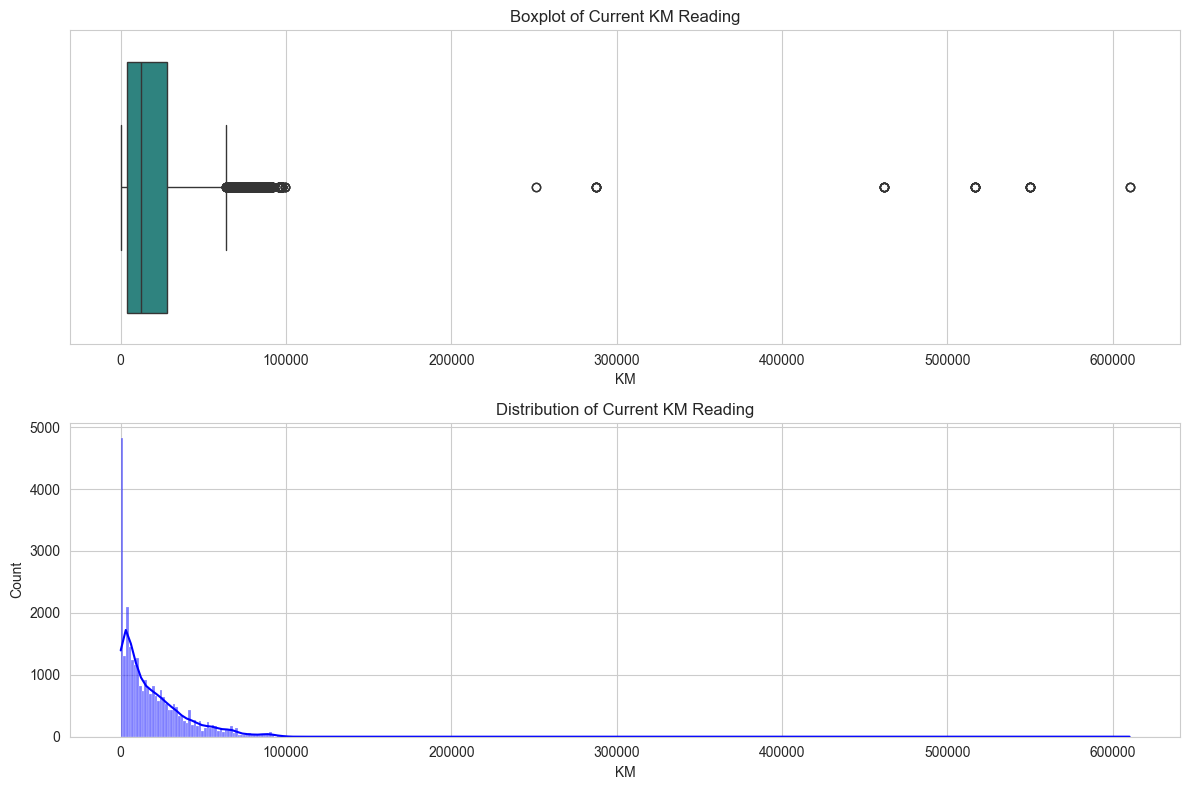

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='current_km_reading', orient='h', palette='viridis')
plt.title('Boxplot of Current KM Reading')
plt.xlabel('KM')

plt.subplot(2, 1, 2)
sns.histplot(data=df, x='current_km_reading', kde=True, color='blue')
plt.title('Distribution of Current KM Reading')
plt.xlabel('KM')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [169]:
# Handling extreme values :
df[df['current_km_reading'] > 100000].sort_values('current_km_reading', ascending=False)

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
8429,2017-12-29,2017-12-29,ashwXXXXXXXXXX,MH14CRXXXX,BAJAJ PULSAR LS135,610112,Chain lubrication
8430,2017-12-29,2017-12-29,ashwXXXXXXXXXX,MH14CRXXXX,BAJAJ PULSAR LS135,610112,General service
8428,2017-12-29,2017-12-29,ashwXXXXXXXXXX,MH14CRXXXX,BAJAJ PULSAR LS135,610112,Speedometer cable
451,2017-06-13,2017-06-10,suraXXXXXXXXXX,KA03JCXXXX,BAJAJ PULSAR 150,550147,Speedometer cable
446,2017-06-13,2017-06-10,suraXXXXXXXXXX,KA03JCXXXX,BAJAJ PULSAR 150,550147,Battery charge
452,2017-06-13,2017-06-10,suraXXXXXXXXXX,KA03JCXXXX,BAJAJ PULSAR 150,550147,Wiring checkup
445,2017-06-13,2017-06-10,suraXXXXXXXXXX,KA03JCXXXX,BAJAJ PULSAR 150,550147,Brake shoe
450,2017-06-13,2017-06-10,suraXXXXXXXXXX,KA03JCXXXX,BAJAJ PULSAR 150,550147,General service
447,2017-06-13,2017-06-10,suraXXXXXXXXXX,KA03JCXXXX,BAJAJ PULSAR 150,550147,Air filter checkup
449,2017-06-13,2017-06-10,suraXXXXXXXXXX,KA03JCXXXX,BAJAJ PULSAR 150,550147,Parking bulb


In [170]:
df.drop(index=df[df['current_km_reading'] > 100000].sort_values('current_km_reading', ascending=False).index.to_list(),inplace=True)


In [171]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,Engine oil
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,Engine oil
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,Polish
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,Consumables
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,Coolant oil
...,...,...,...,...,...,...,...
28477,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,Sprocket rubber
28478,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,Clutch cable
28479,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,Oil filter
28480,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,Disc oil


In [172]:
# Sorted invoice_date chronologically :
df = df.sort_values(by="invoice_date").reset_index(drop=True)

In [173]:
# calculating the service turnaround time or waiting time to finish the service: 
# df['service_days'] = (df['invoice_date'] - df['job_card_date']).dt.days
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')
df['job_card_date'] = pd.to_datetime(df['job_card_date'], dayfirst=True, errors='coerce')

# Now calculate service_days again
df['service_days'] = (df['invoice_date'] - df['job_card_date']).dt.days


In [174]:
df['service_days'].value_counts().to_dict()

{0: 27659, 1: 231, 3: 74, 5: 47, 2: 23, 4: 15, 19: 7, -1: 5, 16: 2}

In [175]:
df[df['service_days']<0]

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text,service_days
18781,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Engine oil,-1
18782,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,General service,-1
18783,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Polish,-1
18784,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Air filter checkup,-1
18785,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Oil filter,-1


In [176]:
df[df['service_days'] == -1]


,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text,service_days
18781,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Engine oil,-1
18782,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,General service,-1
18783,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Polish,-1
18784,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Air filter checkup,-1
18785,2018-08-14,2018-08-15,reetXXXXXXXXXX,177XXXX,BAJAJ V150,769,Oil filter,-1


In [177]:
print(df['invoice_date'].dtype)
print(df['job_card_date'].dtype)


datetime64[ns]
datetime64[ns]


In [178]:
mismatch_dates = df[df['service_days'] == -1].iloc[0]
print("Invoice Date:", mismatch_dates['invoice_date'])
print("Job Card Date:", mismatch_dates['job_card_date'])
print("Service Days:", mismatch_dates['service_days'])


Invoice Date: 2018-08-14 00:00:00
Job Card Date: 2018-08-15 00:00:00
Service Days: -1


In [179]:
# Here we can see that the invoice date is before the job card date which it is an data entry error:
# Identifying rows where invoice_date < job_card_date,and swap the dates :
condition= df['invoice_date']<df['job_card_date']
df.loc[condition, ['invoice_date', 'job_card_date']] = df.loc[condition,['job_card_date', 'invoice_date']].values


In [180]:
# Recalculate service_days
df['service_days'] = (df['invoice_date'] - df['job_card_date']).dt.days

In [181]:
df['service_days'].min()

0

In [182]:
# checking that the invoice and job card dates are swapeed?:
df['service_days'].value_counts().to_dict()

{0: 27659, 1: 236, 3: 74, 5: 47, 2: 23, 4: 15, 19: 7, 16: 2}

In [183]:
df.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text,service_days
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,Engine oil,0
1,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Chain lubrication,0
2,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,3m oil,0
3,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Engine oil,0
4,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,7854,Engine oil,0


In [184]:
df[df['service_days'].isin([16, 19])].groupby(['vehicle_model', 'invoice_line_text']).size()

vehicle_model     invoice_line_text
BAJAJ CT 100      Air filter           1
                  Brake shoe           1
                  Chain lubrication    1
                  Engine oil           1
                  Seat cover           1
                  Tank cover           1
                  Wheel rubber         1
BAJAJ PULSAR 220  Head light doom      1
                  Labour               1
dtype: int64

In [185]:
"""
** BAJAJ CT 100:
-- Air filter, Brake shoe, Chain lubrication, Engine oil, Seat cover, Tank cover, Wheel rubber
   -All of these are simple, fast services that normally don't take > 1 day.

** BAJAJ PULSAR 220
Head light doom, Labour
→ Headlight replacement is also not a long task.

This Suggests that :
- These are most likely data entry errors (wrong dates entered).

- There's no valid reason these basic tasks should take 16–19 days.

- They're also very few in number (only 8 records total).

"""

"\n** BAJAJ CT 100:\n-- Air filter, Brake shoe, Chain lubrication, Engine oil, Seat cover, Tank cover, Wheel rubber\n   -All of these are simple, fast services that normally don't take > 1 day.\n\n** BAJAJ PULSAR 220\nHead light doom, Labour\n→ Headlight replacement is also not a long task.\n\nThis Suggests that :\n- These are most likely data entry errors (wrong dates entered).\n\n- There's no valid reason these basic tasks should take 16–19 days.\n\n- They're also very few in number (only 8 records total).\n\n"

In [186]:
# Filter these out of your dataset because they introduce noise.
# Keep only records with service_days ≤ 7:
df = df[df['service_days'] <= 7]

In [187]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text,service_days
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,Engine oil,0
1,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Chain lubrication,0
2,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,3m oil,0
3,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Engine oil,0
4,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,7854,Engine oil,0
...,...,...,...,...,...,...,...,...
28058,2019-01-06,2019-01-06,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,Chain lubrication,0
28059,2019-01-06,2019-01-06,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,Engine oil,0
28060,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,Disc oil,0
28061,2019-01-06,2019-01-06,PRITXXXXXXXXXX,KA53EWXXXX,BAJAJ PULSAR NS 160,2914,Polish,0


In [188]:
df[df['invoice_line_text']=='Unknown']

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text,service_days
696,2017-06-15,2017-06-14,naveXXXXXXXXXX,KA53W3XXXX,BAJAJ DISCOVER 150,25677,Unknown,1
722,2017-06-15,2017-06-14,kailXXXXXXXXXX,KA01HNXXXX,BAJAJ PULSAR 150,8679,Unknown,1
731,2017-06-16,2017-06-16,hariXXXXXXXXXX,KA53ESXXXX,BAJAJ AVENGER STREET,457,Unknown,0
757,2017-06-16,2017-06-13,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,2615,Unknown,3
2141,2017-07-21,2017-07-21,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,12457,Unknown,0
2532,2017-08-01,2017-08-01,hariXXXXXXXXXX,KA53EQXXXX,BAJAJ PULSAR 150,9677,Unknown,0
10669,2018-02-27,2018-02-27,PRAVXXXXXXXXXX,KA04JBXXXX,BAJAJ PULSAR 150,24447,Unknown,0
10768,2018-03-01,2018-03-01,DARSXXXXXXXXXX,KA04JAXXXX,BAJAJ PULSAR 150,36075,Unknown,0
11116,2018-03-07,2018-03-07,AVINXXXXXXXXXX,KA51ERXXXX,BAJAJ DISCOVER 125,14927,Unknown,0
13598,2018-04-30,2018-04-30,gowtXXXXXXXXXX,TN38BXXXXX,BAJAJ DISCOVER,35015,Unknown,0


In [189]:
df[(df['vehicle_model']=='BAJAJ V') & ((df['current_km_reading']>2500) | (df['current_km_reading']<13000))]

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text,service_days
4,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,7854,Engine oil,0
5,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,7854,Oil filter,0
6,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,2800,Engine oil,0
8,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,2800,General service,0
29,2017-06-01,2017-06-01,diliXXXXXXXXXX,ka 53 XXXX,BAJAJ V,45421,General service,0
30,2017-06-01,2017-06-01,diliXXXXXXXXXX,ka 53 XXXX,BAJAJ V,45421,Engine oil,0
392,2017-06-10,2017-06-10,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,562,Engine oil,0
757,2017-06-16,2017-06-13,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,2615,Unknown,3
1306,2017-06-30,2017-06-30,santXXXXXXXXXX,KA53EPXXXX,BAJAJ V,19869,Chain sprocket,0
1311,2017-06-30,2017-06-30,santXXXXXXXXXX,KA53EPXXXX,BAJAJ V,19869,Chain set,0


In [190]:
df[df['invoice_line_text'] != 'Unknown'].groupby('vehicle_model')['invoice_line_text'].count()

vehicle_model
BAJAJ AVENGER STREET        1103
BAJAJ AVENGER STREET 180     121
BAJAJ AVENGER STREET 220    4162
BAJAJ BOXER CT                 4
BAJAJ CALIBER                 40
BAJAJ CT 100                1394
BAJAJ DISCOVER               651
BAJAJ DISCOVER 125          1339
BAJAJ DISCOVER 135           104
BAJAJ DISCOVER 150           279
BAJAJ DOMINAR 400 ABS          7
BAJAJ PLATINA                829
BAJAJ PULSAR 150            8483
BAJAJ PULSAR 180            2237
BAJAJ PULSAR 220            2605
BAJAJ PULSAR AS 200          413
BAJAJ PULSAR LS135           512
BAJAJ PULSAR NS 160          361
BAJAJ PULSAR NS 200         2179
BAJAJ PULSAR RS 200          310
BAJAJ V                       50
BAJAJ V125                    92
BAJAJ V15                     23
BAJAJ V150                   683
BAJAJ WIND 125                 6
BAJAJ XCD 125                 27
BAJAJ XCD 135                 13
WAVE                          10
Name: invoice_line_text, dtype: int64

In [191]:
df[df['invoice_line_text'] != 'Unknown'].groupby('vehicle_model')['invoice_line_text'].agg(lambda x: x.mode().iloc[0])

vehicle_model
BAJAJ AVENGER STREET                Engine oil
BAJAJ AVENGER STREET 180     Chain lubrication
BAJAJ AVENGER STREET 220            Engine oil
BAJAJ BOXER CT              Air filter checkup
BAJAJ CALIBER                       Engine oil
BAJAJ CT 100                        Engine oil
BAJAJ DISCOVER                      Engine oil
BAJAJ DISCOVER 125                  Engine oil
BAJAJ DISCOVER 135             General service
BAJAJ DISCOVER 150                  Engine oil
BAJAJ DOMINAR 400 ABS                   3m oil
BAJAJ PLATINA                       Engine oil
BAJAJ PULSAR 150                    Engine oil
BAJAJ PULSAR 180                    Engine oil
BAJAJ PULSAR 220                    Engine oil
BAJAJ PULSAR AS 200            General service
BAJAJ PULSAR LS135                  Engine oil
BAJAJ PULSAR NS 160          Chain lubrication
BAJAJ PULSAR NS 200                 Engine oil
BAJAJ PULSAR RS 200                 Engine oil
BAJAJ V                             Engine oil

In [192]:
# Creating a mapping from vehicle_model to most frequent invoice_line_text :
map_df = df[df['invoice_line_text'] != 'Unknown']
model_text_map = map_df.groupby('vehicle_model')['invoice_line_text'].agg(lambda x: x.mode().iloc[0])

# Filling 'Unknown' using this mapping :
def fill_unknown(row):
    if row['invoice_line_text'] == 'Unknown':
        return model_text_map.get(row['vehicle_model'], 'Unknown')
    else:
        return row['invoice_line_text']

df['invoice_line_text'] = df.apply(fill_unknown, axis=1)


In [193]:
# Renaming the invoice_line_text to spare_parts :
df.rename({'invoice_line_text':'Spare_parts'},axis=1,inplace=True)

In [194]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,Spare_parts,service_days
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,Engine oil,0
1,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Chain lubrication,0
2,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,3m oil,0
3,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Engine oil,0
4,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,7854,Engine oil,0
...,...,...,...,...,...,...,...,...
28058,2019-01-06,2019-01-06,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,Chain lubrication,0
28059,2019-01-06,2019-01-06,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,Engine oil,0
28060,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,Disc oil,0
28061,2019-01-06,2019-01-06,PRITXXXXXXXXXX,KA53EWXXXX,BAJAJ PULSAR NS 160,2914,Polish,0


#  Exploratory Data Analysis (EDA) :

##  Univariate Analysis

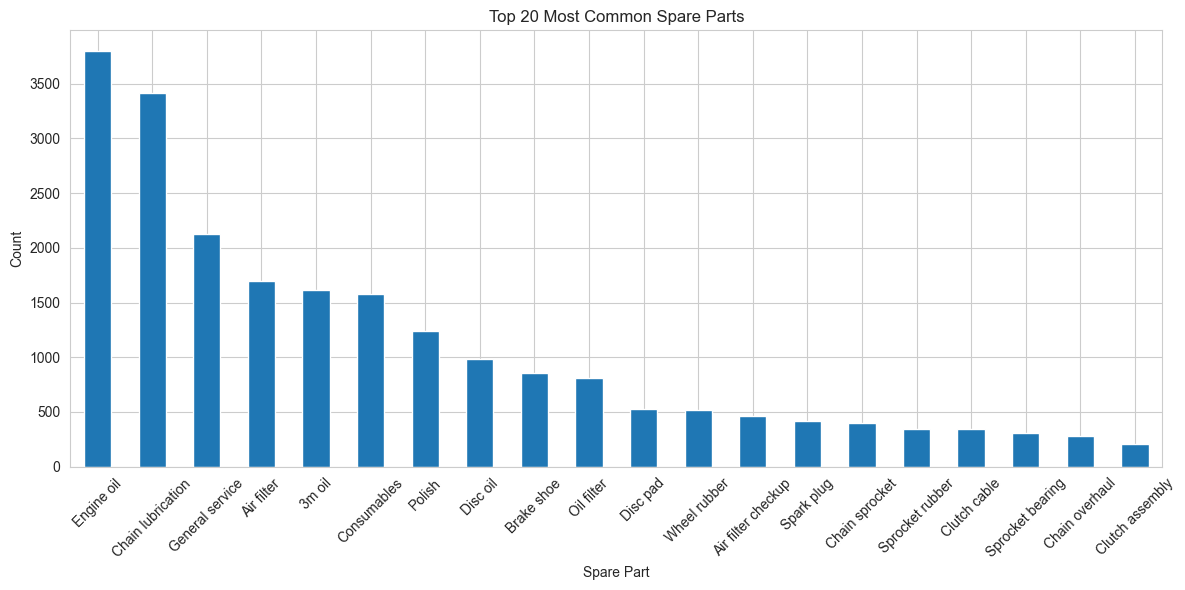

In [195]:
#Spare parts of Top 20 most frequent spare parts:
plt.figure(figsize=(12,6))
df['Spare_parts'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Most Common Spare Parts')
plt.ylabel('Count')
plt.xlabel('Spare Part')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Summary of Insights: Top 20 Most Common Spare Parts

- **Routine Maintenance Dominates**: Engine oil, Chain lubrication, and General service items are the most frequently used, indicating their importance in regular maintenance.

- **Filtration and Fluids**: Air filters, Oil filters, and 3M oil are highly common, reflecting preventive care for engine performance.

- **Consumables and Appearance**: Items like Polish and Consumables suggest demand for aesthetic and general upkeep.

- **Brake and Safety Components**: Disc oil, Brake shoe, and Disc pad appear moderately, indicating regular brake system maintenance.

- **Wear-and-Tear Parts**: Spark plugs, Clutch cables, Bearings, and Sprockets are less frequent but essential for specific repairs.

- **Business Implications**: High-frequency parts should be prioritized for inventory planning, service package design, and forecasting due to their recurring demand.


In [196]:
df['Spare_parts'].value_counts().nlargest(5)

Spare_parts
Engine oil           3798
Chain lubrication    3412
General service      2126
Air filter           1695
3m oil               1615
Name: count, dtype: int64

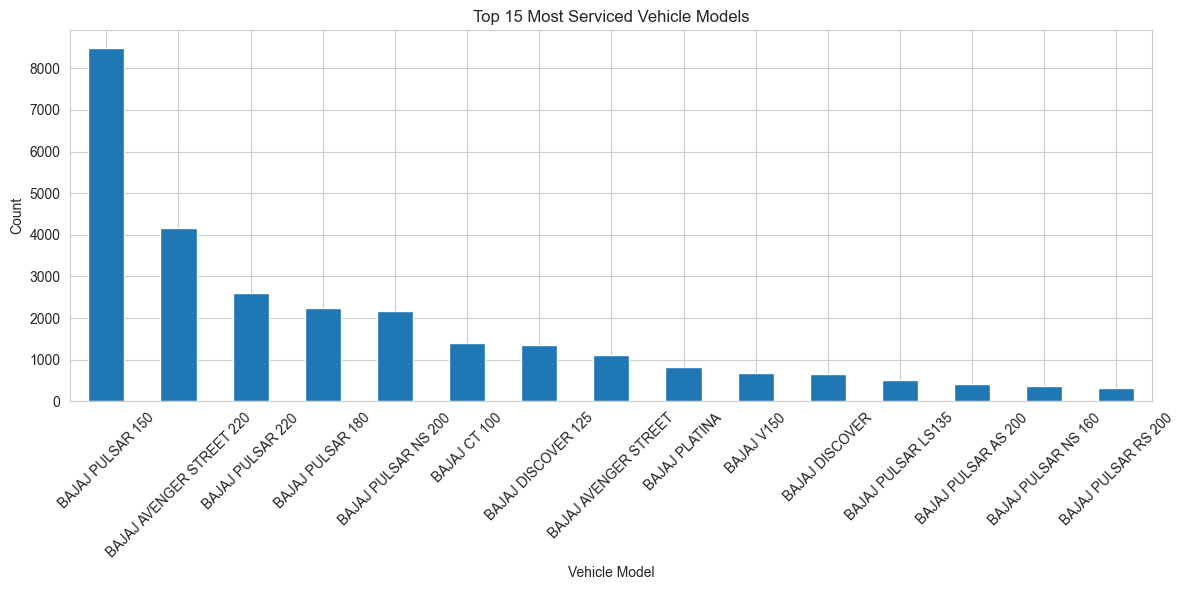

In [197]:
# Top 15 vehicle models :
plt.figure(figsize=(12,6))
df['vehicle_model'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Most Serviced Vehicle Models')
plt.ylabel('Count')
plt.xlabel('Vehicle Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


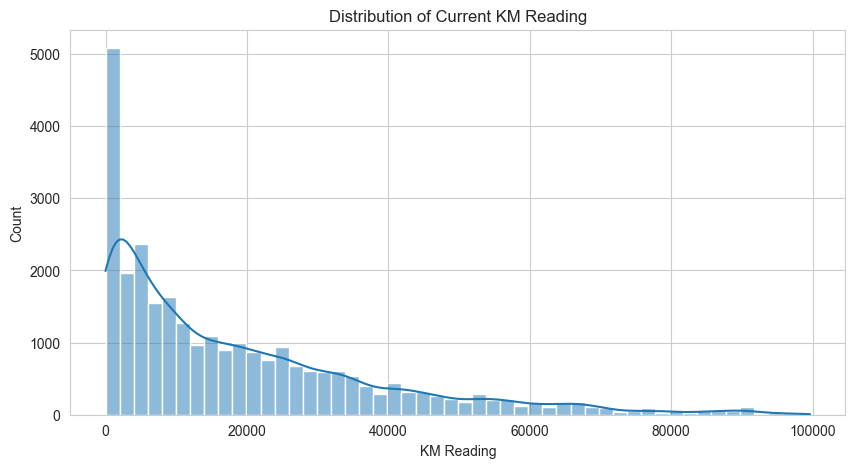

In [198]:
# Distribution of odometer readings :
plt.figure(figsize=(10,5))
sns.histplot(df['current_km_reading'], bins=50, kde=True)
plt.title('Distribution of Current KM Reading')
plt.xlabel('KM Reading')
plt.ylabel('Count')
plt.show()


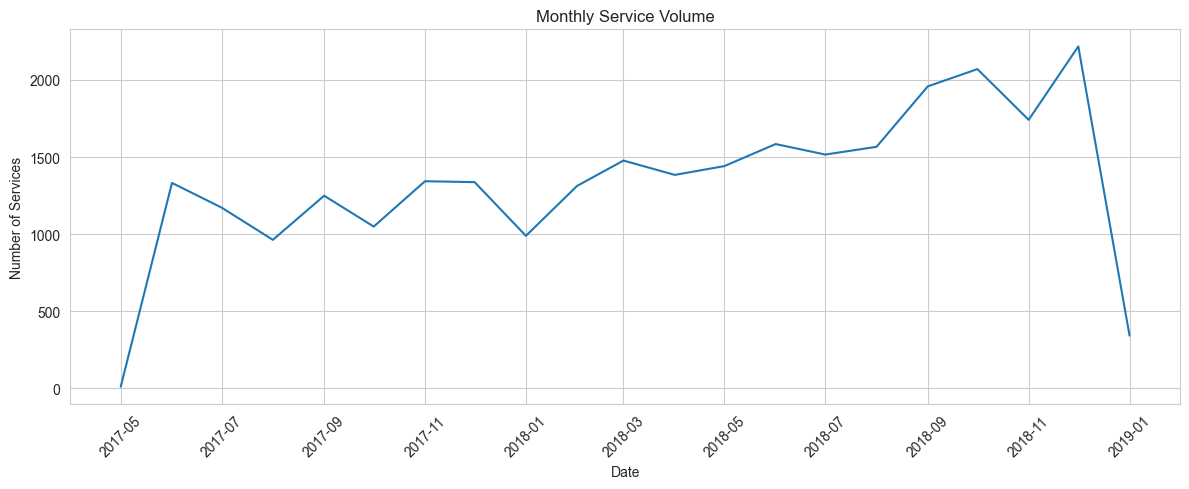

In [199]:
# Extract month and year :
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year

# Monthly trend :
monthly_trend = df.groupby(['year', 'month']).size().reset_index(name='count')
monthly_trend['date'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_trend, x='date', y='count')
plt.title('Monthly Service Volume')
plt.xlabel('Date')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [200]:
df.groupby(['year', 'month']).size().reset_index(name='count')

,year,month,count
0,2017,5,11
1,2017,6,1332
2,2017,7,1172
3,2017,8,963
4,2017,9,1249
5,2017,10,1049
6,2017,11,1343
7,2017,12,1337
8,2018,1,989
9,2018,2,1313


## Insights Summary

### 1. Top 15 Most Serviced Vehicle Models
- **BAJAJ PULSAR 150** dominates with the highest number of service entries (~8500), indicating its popularity and high usage.
- Models like **AVENGER STREET 220** and **PULSAR 220** follow with significantly fewer service counts (~4000 and ~2500).
- The majority of the top 15 models belong to the **BAJAJ PULSAR** and **DISCOVER** series.
- This highlights the service demand for Pulsar variants and suggests that stocking parts for these models should be prioritized.


### 2. Distribution of Current KM Reading
- The distribution is **right-skewed**, with most vehicles having **lower KM readings** (below 20,000 km).
- A large concentration of vehicles (~5000) have very low readings (< 5000 km), indicating frequent servicing in early vehicle life.
- Very few vehicles exceed 80,000–100,000 km, suggesting either scrappage, resale, or drop in servicing for older vehicles.


### 3. Monthly Service Volume Trend
- The number of services **increased steadily** from mid-2017 through 2018, showing growing service demand.
- **Peaks observed** in late 2018 (Oct–Nov) with more than 2000 services, suggesting seasonal or operational factors influencing volume.
- A **sharp drop in Jan 2019**, possibly due to incomplete data or business closure in that month.


## Bivariate Analysis

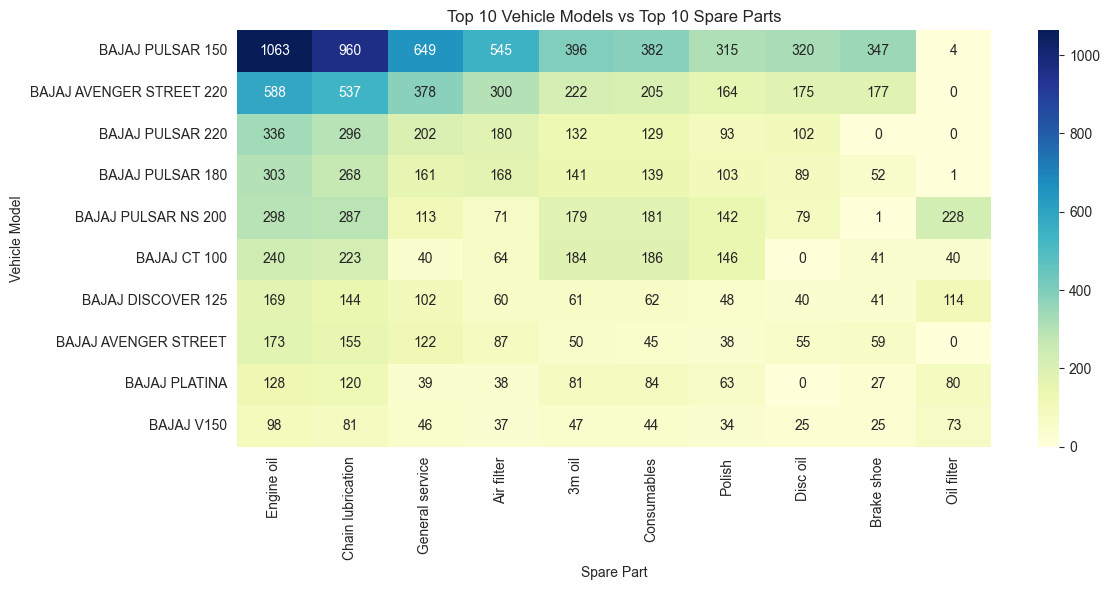

In [201]:
# Cross-tab of model vs part :
cross_tab = pd.crosstab(df['vehicle_model'], df['Spare_parts'])
top_models = df['vehicle_model'].value_counts().head(10).index
top_parts = df['Spare_parts'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.heatmap(cross_tab.loc[top_models, top_parts], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Vehicle Models vs Top 10 Spare Parts')
plt.ylabel('Vehicle Model')
plt.xlabel('Spare Part')
plt.tight_layout()
plt.show()


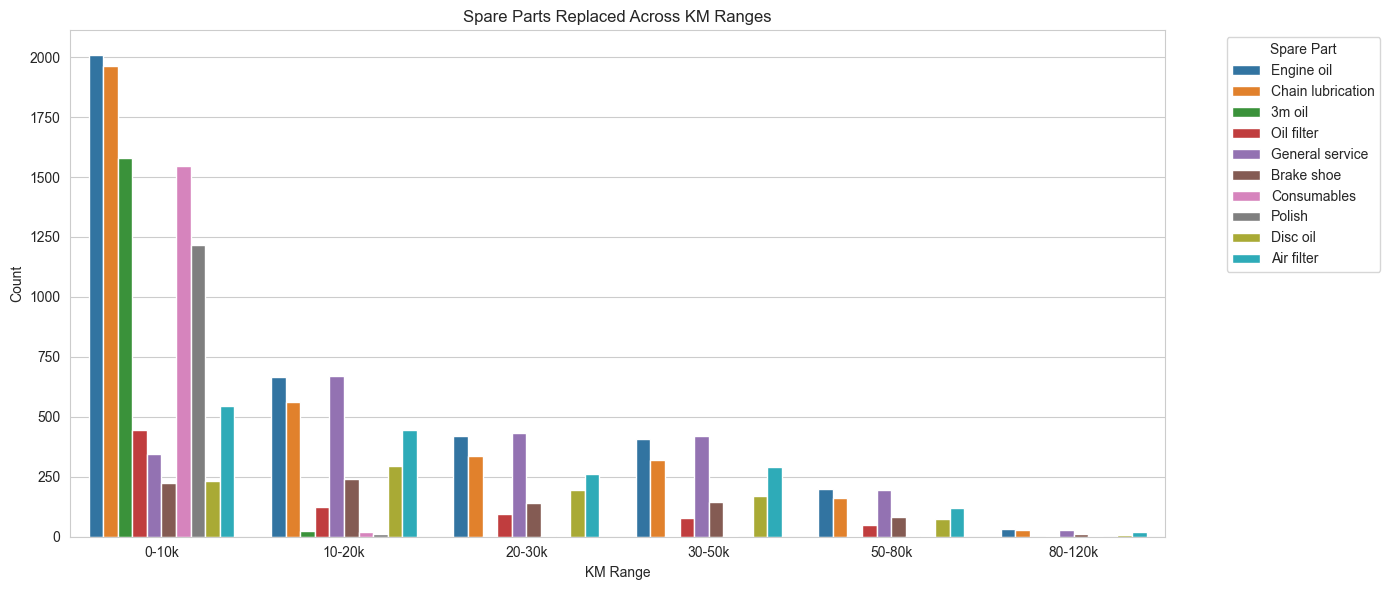

In [202]:
# Bin the km reading :
df['km_bin'] = pd.cut(df['current_km_reading'], bins=[0, 10000, 20000, 30000, 50000, 80000, 120000], 
                      labels=['0-10k', '10-20k', '20-30k', '30-50k', '50-80k', '80-120k'])

# Countplot
plt.figure(figsize=(14,6))
sns.countplot(data=df[df['Spare_parts'].isin(top_parts)], x='km_bin', hue='Spare_parts')
plt.title('Spare Parts Replaced Across KM Ranges')
plt.xlabel('KM Range')
plt.ylabel('Count')
plt.legend(title='Spare Part', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


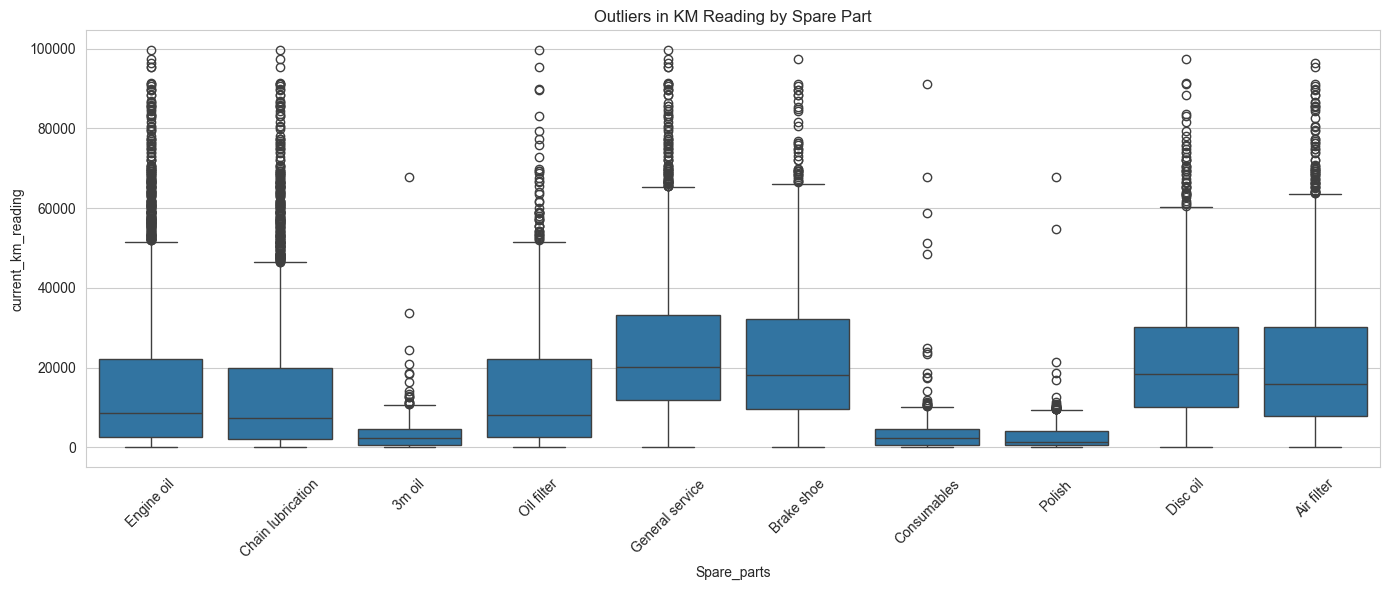

In [203]:
# Boxplot to spot outliers in KM readings by part :
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['Spare_parts'].isin(top_parts)], x='Spare_parts', y='current_km_reading')
plt.xticks(rotation=45)
plt.title('Outliers in KM Reading by Spare Part')
plt.tight_layout()
plt.show()


In [204]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,Spare_parts,service_days,month,year,km_bin
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,Engine oil,0,5,2017,30-50k
1,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Chain lubrication,0,5,2017,0-10k
2,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,3m oil,0,5,2017,0-10k
3,2017-05-31,2017-05-31,VENKXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5391,Engine oil,0,5,2017,0-10k
4,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,7854,Engine oil,0,5,2017,0-10k
...,...,...,...,...,...,...,...,...,...,...,...
28058,2019-01-06,2019-01-06,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,Chain lubrication,0,1,2019,80-120k
28059,2019-01-06,2019-01-06,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,Engine oil,0,1,2019,80-120k
28060,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,Disc oil,0,1,2019,10-20k
28061,2019-01-06,2019-01-06,PRITXXXXXXXXXX,KA53EWXXXX,BAJAJ PULSAR NS 160,2914,Polish,0,1,2019,0-10k


In [205]:
## Saving the Half Preprocessed data for further operations :
try:
    file_path=os.path.join(os.path.dirname(os.getcwd()),'data','preprocessed_data')
    os.makedirs(file_path,exist_ok=True)
    df.to_csv(os.path.join(file_path,'processed_df.csv'),index=False)
    print('processed_df.csv file is saved succesfully...')
except Exception as e:
    raise f'Exception occured : {str(e)}'

processed_df.csv file is saved succesfully...
